### Load package

In [ ]:
# Install package first
# We use uv for faster installation
!pip install uv
!uv pip install -q autogluon.timeseries --system
!uv pip uninstall -q torchaudio torchvision torchtext --system # fix incompatible package versions on Colab

## if there seems to be inconsistency due to numpy & pandas versions, do the following
!uv pip uninstall pandas numpy
!uv pip install -q --force-reinstall numpy==1.26.4 --system
!uv pip install -q --force-reinstall pandas==2.2.2 --system
## You may need to restart colab kernel

Using Python 3.11.11 environment at: /usr
Uninstalled 2 packages in 221ms
 - numpy==1.26.4
 - pandas==2.2.2


In [ ]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/GE_Capstone/Model Test/Forecasting

/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting


**Regarding Forecasting/prediction Length:**
- Data length<180: prediction length=24
- 180<Data length<300: prediction length = 36
- 300<Data length<1000: prediction length = 48
- Data length>=1000: prediction length = 100

## Zero-shot Forecasting for 20 time series from PdM_telemetry

In [ ]:
import re

# Function to determine prediction length based on data length
def get_prediction_length(sheet_name):
    """Extract data length from sheet name and determine prediction length"""
    match = re.search(r'_(\d+)$', sheet_name)  # Extract last numeric part
    if match:
        data_length = int(match.group(1))
        if data_length < 180:
            return 24
        elif data_length < 300:
            return 36
        elif data_length < 1000:
            return 48
        else:
            return 100
    else:
        raise ValueError(f"Cannot determine data length from sheet name: {sheet_name}")

### Chronos Bolt_small

In [ ]:
# Define input file
file_path = "Chronos_PdM_forecasting_reformat.xlsx"

# Load all sheets
all_series = pd.read_excel(file_path, sheet_name=None, parse_dates=True)

In [ ]:
# Storage for leaderboard results
leaderboard_results = []

# Loop over all time series sheets
for series_name, data in all_series.items():
    print(f"Processing {series_name}...")

    # Determine prediction length
    prediction_length = get_prediction_length(series_name)

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(data)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
        train_data, presets="bolt_small"
    )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', series_name)  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save leaderboard results to an Excel file
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_file = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_small.xlsx"
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)
# take less than 1 min

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020227'


Processing volt_200...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       11.15 GB / 12.67 GB (88.0%)
Disk Space Avail:   61.97 GB / 107.72 GB (57.5%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 164 rows, 1 time series. Median time series length is 164 (min=164, max=164). 

Provided data contains following co

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/191M [00:00<?, ?B/s]

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020256'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_

Processing volt_500...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020257'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing volt_2000...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020300'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.60 GB / 12.67 GB (83.7%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing volt_5000...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020301'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.60 GB / 12.67 GB (83.6%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing volt_8761...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020303'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.63 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing rotate_200...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020304'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.63 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_

Processing rotate_500...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020305'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.63 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing rotate_2000...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020307'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.63 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing rotate_5000...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020308'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.63 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing rotate_8761...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020310'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.63 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing pressure_200...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020321'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.59 GB / 12.67 GB (83.6%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_

Processing pressure_500...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020322'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.59 GB / 12.67 GB (83.6%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing pressure_2000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020324'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.59 GB / 12.67 GB (83.6%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing pressure_5000...


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020325'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.61 GB / 12.67 GB (83.7%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit

Processing pressure_8761...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020327'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.59 GB / 12.67 GB (83.6%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing vibration_200...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020329'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.74 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing vibration_500...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020330'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.74 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing vibration_2000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020331'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.74 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing vibration_5000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020333'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.74 GB / 107.72 GB (57.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction

Processing vibration_8761...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


Processing complete! Results saved to: Chronos_Forecasting_zero_shot_Leaderboard_bolt_small.xlsx


### Chronos Bolt_base

In [ ]:
# Define input file
file_path = "Chronos_PdM_forecasting_reformat.xlsx"

# Load all sheets
all_series = pd.read_excel(file_path, sheet_name=None, parse_dates=True)

In [ ]:
# Storage for leaderboard results
leaderboard_results = []

# Loop over all time series sheets
for series_name, data in all_series.items():
    print(f"Processing {series_name}...")

    # Determine prediction length
    prediction_length = get_prediction_length(series_name)

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(data)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
        train_data, presets="bolt_base"
    )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', series_name)  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save leaderboard results to an Excel file
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_file = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_base.xlsx"
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)
# take less than 1 min

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020701'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   61.74 GB / 107.72 GB (57.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series

Processing volt_200...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020711'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.51 GB / 12.67 GB (82.9%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_ev

Processing volt_500...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020714'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.50 GB / 12.67 GB (82.9%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing volt_2000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020717'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing volt_5000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020719'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing volt_8761...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020722'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing rotate_200...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020724'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.50 GB / 12.67 GB (82.8%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing rotate_500...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020726'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.51 GB / 12.67 GB (82.9%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing rotate_2000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020729'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.54 GB / 12.67 GB (83.2%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing rotate_5000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020732'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.54 GB / 12.67 GB (83.1%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing rotate_8761...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020735'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.54 GB / 12.67 GB (83.1%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing pressure_200...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020736'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing pressure_500...


Total runtime: 0.09 s
Best model: Chronos[bolt_base]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020739'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.55 GB / 12.67 GB (83.2%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariat

Processing pressure_2000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020742'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.54 GB / 12.67 GB (83.2%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing pressure_5000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020744'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.54 GB / 12.67 GB (83.1%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing pressure_8761...


Training complete. Models trained: ['Chronos[bolt_base]']
Total runtime: 0.07 s
Best model: Chronos[bolt_base]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020747'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.0%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing vibration_200...


Total runtime: 0.06 s
Best model: Chronos[bolt_base]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020749'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.51 GB / 12.67 GB (82.9%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariat

Processing vibration_500...



AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 02:07:50
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_base]']
Total runtime: 0.08 s
Best model: Chronos[bolt_base]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020752'
=================== System Info ===================
AutoGluon Version:  1.2
Python Versio

Processing vibration_2000...


	0.04    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_base]']
Total runtime: 0.09 s
Best model: Chronos[bolt_base]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020755'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.48 GB / 12.67 GB (82.7%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing vibration_5000...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_020758'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.48 GB / 12.67 GB (82.7%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing vibration_8761...


Total runtime: 0.06 s
Best model: Chronos[bolt_base]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


Processing complete! Results saved to: Chronos_Forecasting_zero_shot_Leaderboard_bolt_base.xlsx


### Chronos Bolt_mini

In [ ]:
# Define input file
file_path = "Chronos_PdM_forecasting_reformat.xlsx"

# Load all sheets
all_series = pd.read_excel(file_path, sheet_name=None, parse_dates=True)

In [ ]:
# Storage for leaderboard results
leaderboard_results = []

# Loop over all time series sheets
for series_name, data in all_series.items():
    print(f"Processing {series_name}...")

    # Determine prediction length
    prediction_length = get_prediction_length(series_name)

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(data)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
        train_data, presets="bolt_mini"
    )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', series_name)  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save leaderboard results to an Excel file
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_file = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_mini.xlsx"
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)
# take less than 30 sec

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021107'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   61.01 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series

Processing volt_200...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.05 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/85.0M [00:00<?, ?B/s]

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021109'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.4%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_ev

Processing volt_500...


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021111'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.57 GB / 12.67 GB (83.4%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_le

Processing volt_2000...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.08 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021112'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.56 GB / 12.67 GB (83.3%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing volt_5000...


Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021114'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.57 GB / 12.67 GB (83.4%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariat

Processing volt_8761...


Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021115'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.59 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_v

Processing rotate_200...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.05 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021116'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing rotate_500...


Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021118'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariat

Processing rotate_2000...


Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021119'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_v

Processing rotate_5000...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021120'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing rotate_8761...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021122'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing pressure_200...



Starting training. Start time is 2025-03-19 02:11:22
Models that will be trained: ['Chronos[bolt_mini]']
Training timeseries model Chronos[bolt_mini]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021123'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 1

Processing pressure_500...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.07 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021124'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing pressure_2000...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.08 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021126'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing pressure_5000...



Starting training. Start time is 2025-03-19 02:11:26
Models that will be trained: ['Chronos[bolt_mini]']
Training timeseries model Chronos[bolt_mini]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.07 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021127'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 1

Processing pressure_8761...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.08 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021129'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing vibration_200...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.07 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021130'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.4%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing vibration_500...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021131'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing vibration_2000...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021132'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing vibration_5000...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021134'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.58 GB / 12.67 GB (83.4%)
Disk Space Avail:   60.93 GB / 107.72 GB (56.6%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing vibration_8761...


Training complete. Models trained: ['Chronos[bolt_mini]']
Total runtime: 0.06 s
Best model: Chronos[bolt_mini]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_mini]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


Processing complete! Results saved to: Chronos_Forecasting_zero_shot_Leaderboard_bolt_mini.xlsx


### Chronos Bolt_tiny

In [ ]:
# Define input file
file_path = "Chronos_PdM_forecasting_reformat.xlsx"

# Load all sheets
all_series = pd.read_excel(file_path, sheet_name=None, parse_dates=True)

In [ ]:
# Storage for leaderboard results
leaderboard_results = []

# Loop over all time series sheets
for series_name, data in all_series.items():
    print(f"Processing {series_name}...")

    # Determine prediction length
    prediction_length = get_prediction_length(series_name)

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(data)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
        train_data, presets="bolt_tiny"
    )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', series_name)  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save leaderboard results to an Excel file
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_file = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_tiny.xlsx"
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)
# take less than 30 sec

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021304'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.56 GB / 12.67 GB (83.3%)
Disk Space Avail:   60.92 GB / 107.72 GB (56.6%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series

Processing volt_200...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021306'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_ev

Processing volt_500...


Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.09 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021308'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 

Processing volt_2000...


Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021309'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing volt_5000...


Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021310'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing volt_8761...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021311'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing rotate_200...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021313'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing rotate_500...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021314'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing rotate_2000...


Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021315'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 

Processing rotate_5000...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021316'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing rotate_8761...


Training timeseries model Chronos[bolt_tiny]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021318'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting wi

Processing pressure_200...


Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.08 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021319'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing pressure_500...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.08 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021321'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing pressure_2000...


Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021322'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 

Processing pressure_5000...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021323'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.53 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing pressure_8761...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021325'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.51 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing vibration_200...


Training timeseries model Chronos[bolt_tiny]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021326'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting wi

Processing vibration_500...


Training timeseries model Chronos[bolt_tiny]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.06 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021327'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting wi

Processing vibration_2000...


Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021329'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 

Processing vibration_5000...


	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_021330'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   60.89 GB / 107.72 GB (56.5%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_

Processing vibration_8761...


Training timeseries model Chronos[bolt_tiny]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_tiny]']
Total runtime: 0.07 s
Best model: Chronos[bolt_tiny]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_tiny]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


Processing complete! Results saved to: Chronos_Forecasting_zero_shot_Leaderboard_bolt_tiny.xlsx


## Zero-shot Forecasting for 80 time series from other data sources

In [ ]:
# Function to determine prediction length based on data length
def get_prediction_length(file_name):
    """Extract data length from file name and determine prediction length"""
    match = re.search(r'_(\d+)\.csv$', file_name)  # Extract last numeric part before .csv
    if match:
        data_length = int(match.group(1))
        if data_length < 180:
            return 24
        elif data_length < 300:
            return 36
        elif data_length < 1000:
            return 48
        else:
            return 100
    else:
        raise ValueError(f"Cannot determine data length from file name: {file_name}")

### Chronos Bolt_small

In [ ]:
import os
import re

# Define directories
input_dir = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos Forecasting Data Reformat/"
leaderboard_file = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_small.xlsx"

# Files that require manual frequency specification
weekly_freq_files = {
    "reform_ILINetDataset_DARTS_%WEIGHTED_ILI_1041.csv",
    "reform_ILINetDataset_DARTS_age0to4_1041.csv",
    "reform_ILINetDataset_DARTS_age5to24_1041.csv",
    "reform_ILINetDataset_DARTS_age25to49_677.csv",
    "reform_ILINetDataset_DARTS_age25to64_364.csv",
    "reform_ILINetDataset_DARTS_age50to64_677.csv",
    "reform_ILINetDataset_DARTS_age65_1041.csv",
    "reform_ILINetDataset_DARTS_illtotal_1041.csv",
    "reform_ILINetDataset_DARTS_num_provider_1041.csv",
    "reform_ILINetDataset_DARTS_total_patient_1041.csv",
    "reform_USGasolineDataset_DARTS_1578.csv"
}

daily_freq_files = {
    "reform_TemperatureDataset_DARTS_3650.csv",
    "reform_TemperatureDataset_DARTS_200.csv",
    "reform_TemperatureDataset_DARTS_500.csv",
    "reform_TemperatureDataset_DARTS_2000.csv"
}

half_second_freq_file = "reform_HeartRateDataset_DARTS_1800.csv"

# Get all CSV files in the input directory
csv_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Load existing leaderboard data
if os.path.exists(leaderboard_file):
    existing_leaderboard = pd.read_excel(leaderboard_file)
    leaderboard_results = [existing_leaderboard]  # Append new results later
else:
    leaderboard_results = []

In [ ]:
# Process all time series files
for file in csv_files:
    print(f"Processing {file}...")
    print("===================================================")

    file_path = os.path.join(input_dir, file)

    # Read CSV file
    df = pd.read_csv(file_path)

    # Ensure correct column names
    df.columns = ['item_id', 'timestamp', 'target']

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(df)

    # Determine prediction length
    prediction_length = get_prediction_length(file)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    if file in weekly_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='W').fit(
            train_data, presets="bolt_small"
        )
    elif file in daily_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='D').fit(
            train_data, presets="bolt_small"
        )
    elif file == half_second_freq_file:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='500ms').fit(
            train_data, presets="bolt_small"
        )
    else:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
            train_data, presets="bolt_small"
        )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', file.replace('.csv', ''))  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save updated leaderboard results
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)

# takes about 4 min

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_043748'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.31 GB / 12.67 GB (81.3%)
Disk Space Avail:   60.75 GB / 107.72 GB (56.4%)
Setting presets to: bolt_small


Processing reform_MonthlyMilkDataset_DARTS_168.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 144 rows, 1 time series. Median time series length is 144 (min=144, max=144). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:37:48
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.0

Processing reform_HeaterDataset_DARTS_198.csv...


Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:37:51
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.17 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluo

Processing reform_AirPassengersDataset_DARTS_144.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 120 rows, 1 time series. Median time series length is 120 (min=120, max=120). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:37:53
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_IceCreamDataset_DARTS_198.csv...


Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:37:55
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.22 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Frequency 'W' stored as 'W-SUN'
Beginnin

Processing reform_ILINetDataset_DARTS_age25to64_364.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 317 rows (NaN fraction=0.3%), 1 time series. Median time series length is 317 (min=317, max=317). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:00
Models that will be trained: [

Processing reform_ILINetDataset_DARTS_%WEIGHTED_ILI_1041.csv...


train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:03
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.17 s
Best model: Chronos[bolt_small]
data with frequency 'None' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'None' has been resampled 

Processing reform_TemperatureDataset_DARTS_3650.csv...


train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 3552 rows (NaN fraction=0.1%), 1 time series. Median time series length is 3552 (min=3552, max=3552). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:05
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.23 s
Best model: Chronos[bolt_small]
data with frequency 'None' has been resampled to frequency 'D'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'None' has been resampled to f

Processing reform_SunspotsDataset_DARTS_2820.csv...


Inferred time series frequency: 'MS'
Provided train_data has 2720 rows, 1 time series. Median time series length is 2720 (min=2720, max=2720). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:08
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.18 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Frequency 'W' stored as 'W-SUN'
Begi

Processing reform_ILINetDataset_DARTS_age0to4_1041.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:10
Models that will be trained: 

Processing reform_ILINetDataset_DARTS_age5to24_1041.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:13
Models that will be trained: 

Processing reform_ILINetDataset_DARTS_age25to49_677.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time series length is 631 (min=631, max=631). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:15
Models that will be trained: ['Chronos[bolt_small]']
Tr

Processing reform_ILINetDataset_DARTS_illtotal_1041.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:17
Models that will be trained: 

Processing reform_ILINetDataset_DARTS_age50to64_677.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time series length is 631 (min=631, max=631). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:20
Models that will be trained: ['Chronos[bolt_small]']
Tr

Processing reform_ILINetDataset_DARTS_age65_1041.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:22
Models that will be trained: ['Chronos[bolt_small]']
T

Processing reform_ILINetDataset_DARTS_total_patient_1041.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:24
Models that will be trained: 

Processing reform_ExchangeRateDataset_DARTS_aus_7588.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:27
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_ILINetDataset_DARTS_num_provider_1041.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:29
Models that will be trained: ['Chronos[bolt_small]']
T

Processing reform_ExchangeRateDataset_DARTS_brt_7588.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:32
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_ExchangeRateDataset_DARTS_aus_1000.csv...


Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:34
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.18 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon

Processing reform_ExchangeRateDataset_DARTS_brt_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:36
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_ExchangeRateDataset_DARTS_brt_3000.csv...


Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:39
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.18 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoG

Processing reform_ExchangeRateDataset_DARTS_can_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:41
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_ExchangeRateDataset_DARTS_chn_7588.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:43
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_ExchangeRateDataset_DARTS_can_1000.csv...


Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:46
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.20 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon

Processing reform_ExchangeRateDataset_DARTS_aus_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:48
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_ExchangeRateDataset_DARTS_chn_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:50
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_ExchangeRateDataset_DARTS_can_7588.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:53
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_ExchangeRateDataset_DARTS_chn_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:55
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_AirQuality_UCI_ML_Repo_CO_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:38:58
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_AirQuality_UCI_ML_Repo_CO_9357.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:00
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_AirQuality_UCI_ML_Repo_CO_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:03
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_AirQuality_UCI_ML_Repo_O3_9357.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:05
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_AirQuality_UCI_ML_Repo_O3_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:09
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_AirQuality_UCI_ML_Repo_O3_1000.csv...


Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:13
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.18 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon

Processing reform_AirQuality_UCI_ML_Repo_RH_9357.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:15
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_AirQuality_UCI_ML_Repo_RH_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:18
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_AirQuality_UCI_ML_Repo_RH_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:21
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_EnergyDataset_DARTS_fossilgas_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:23
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_EnergyDataset_DARTS_fossilgas_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:26
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_EnergyDataset_DARTS_fossilgas_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:29
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_EnergyDataset_DARTS_fossialoil_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:32
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_EnergyDataset_DARTS_fossialoil_10000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:34
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_EnergyDataset_DARTS_solar_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:36
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_EnergyDataset_DARTS_fossialoil_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:39
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_EnergyDataset_DARTS_solar_1000.csv...


Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:41
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_small]']
Total runtime: 0.20 s
Best model: Chronos[bolt_small]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon

Processing reform_EnergyDataset_DARTS_solar_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:44
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_ETTh1Dataset_DARTS_OT_17420.csv...


Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:47
Models that will be trained: ['Chronos[bolt_small]']
Training time

Processing reform_ETTh1Dataset_DARTS_OT_10000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:49
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_ETTh1Dataset_DARTS_OT_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:39:52
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_ETTh1Dataset_DARTS_OT_1000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.19 GB / 12.67 GB (80.4%)
Disk Space Avail:   60.69 GB / 107.72 GB (56.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following c

Processing reform_ETTh2Dataset_DARTS_OT_17420.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:00
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_ETTh2Dataset_DARTS_OT_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:02
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_USGasolineDataset_DARTS_1578.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'W-FRI' has been resampled to frequency 'W-SUN'.
Provided train_data has 1478 rows, 1 time series. Median time series length is 1478 (min=1478, max=1478). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:05
Models that will be trained: ['Chronos[bolt_

Processing reform_ETTh2Dataset_DARTS_OT_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:07
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_ETTh2Dataset_DARTS_OT_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:10
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_ETTm1Dataset_DARTS_OT_20000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:12
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_s

Processing reform_ETTm1Dataset_DARTS_OT_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:15
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_ETTm1Dataset_DARTS_OT_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:17
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_ETTm1Dataset_DARTS_OT_3000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:20
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Trai

Processing reform_ETTm2Dataset_DARTS_OT_20000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:22
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = 

Processing reform_GasRateDataset_DARTS_296.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:25
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_CO2Dataset_DARTS_296.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:27
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_SunspotsDataset_DARTS_500.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:29
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_AusBeerDataset_DARTS_211.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'QS-OCT'
Provided train_data has 175 rows, 1 time series. Median time series length is 175 (min=175, max=175). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:31
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_ETTm2Dataset_DARTS_OT_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:34
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_ETTm2Dataset_DARTS_OT_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:36
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_ETTm2Dataset_DARTS_OT_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:39
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_WineDataset_DARTS_176.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 152 rows, 1 time series. Median time series length is 152 (min=152, max=152). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:41
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training run

Processing reform_TaylorDataset_DARTS_4032.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '30min'
Provided train_data has 3932 rows, 1 time series. Median time series length is 3932 (min=3932, max=3932). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:44
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_TemperatureDataset_DARTS_500.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:46
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training r

Processing reform_TemperatureDataset_DARTS_2000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 1901 rows (NaN fraction=0.1%), 1 time series. Median time series length is 1901 (min=1901, max=1901). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:48
Models that will be trained: ['Ch

Processing reform_TemperatureDataset_DARTS_200.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 164 rows, 1 time series. Median time series length is 164 (min=164, max=164). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:52
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training r

Processing reform_WeatherDataset_DARTS_pressure_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:54
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_WeatherDataset_DARTS_pressure_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:57
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_WeatherDataset_DARTS_pressure_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:40:59
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 
	0.01    s     = Training

Processing reform_WeatherDataset_DARTS_windspeed_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:41:02
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small]. 


Processing reform_WeatherDataset_DARTS_windspeed_10000.csv...


Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:41:05
Models that will be trained: ['Chronos[bolt_small]']
Training time

Processing reform_WeatherDataset_DARTS_windspeed_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:41:08
Models that will be trained: ['Chronos[bolt_small]']
Training timeseries model Chronos[bolt_small

Processing reform_HeartRateDataset_DARTS_1800.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': '500ms',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '500ms'.
Provided train_data has 16975 rows (NaN fraction=90.0%), 1 time series. Median time series length is 16975 (min=16975, max=16975). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:41:11
Models that will be 

Processing reform_WoolyDataset_DARTS_119.csv...


Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_044116'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.22 GB / 12.67 GB (80.6%)
Disk Space Avail:   60.67 GB / 107.72 GB (56.3%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time seri

Processing complete! Results saved to: /content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_small.xlsx


### Chronos Bolt_base

In [ ]:
import os
import re

# Define directories
input_dir = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos Forecasting Data Reformat/"
leaderboard_file = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_base.xlsx"

# Get all CSV files in the input directory
csv_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Load existing leaderboard data
if os.path.exists(leaderboard_file):
    existing_leaderboard = pd.read_excel(leaderboard_file)
    leaderboard_results = [existing_leaderboard]  # Append new results later
else:
    leaderboard_results = []

In [ ]:
# Process all time series files
for file in csv_files:
    print(f"Processing {file}...")
    print("===================================================")

    file_path = os.path.join(input_dir, file)

    # Read CSV file
    df = pd.read_csv(file_path)

    # Ensure correct column names
    df.columns = ['item_id', 'timestamp', 'target']

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(df)

    # Determine prediction length
    prediction_length = get_prediction_length(file)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    if file in weekly_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='W').fit(
            train_data, presets="bolt_base"
        )
    elif file in daily_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='D').fit(
            train_data, presets="bolt_base"
        )
    elif file == half_second_freq_file:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='500ms').fit(
            train_data, presets="bolt_base"
        )
    else:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
            train_data, presets="bolt_base"
        )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', file.replace('.csv', ''))  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save updated leaderboard results
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)

# takes about 5 min

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_044411'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.20 GB / 12.67 GB (80.5%)
Disk Space Avail:   60.67 GB / 107.72 GB (56.3%)


Processing reform_MonthlyMilkDataset_DARTS_168.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 144 rows, 1 time series. Median time series length is 144 (min=144, max=144). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:12
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_HeaterDataset_DARTS_198.csv...


Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:16
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_base]']
Total runtime: 0.21 s
Best model: Chronos[bolt_base]
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Beginning AutoGluon training...
AutoGluon wil

Processing reform_AirPassengersDataset_DARTS_144.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 120 rows, 1 time series. Median time series length is 120 (min=120, max=120). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:19
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_IceCreamDataset_DARTS_198.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:21
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_ILINetDataset_DARTS_age25to64_364.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 317 rows (NaN fraction=0.3%), 1 time series. Median time series length is 317 (min=317, max=317). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:24
M

Processing reform_ILINetDataset_DARTS_%WEIGHTED_ILI_1041.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:27


Processing reform_TemperatureDataset_DARTS_3650.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 3552 rows (NaN fraction=0.1%), 1 time series. Median time series length is 3552 (min=3552, max=3552). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:32
Models that will be trained: ['Chr

Processing reform_SunspotsDataset_DARTS_2820.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 2720 rows, 1 time series. Median time series length is 2720 (min=2720, max=2720). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:37
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0

Processing reform_ILINetDataset_DARTS_age0to4_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.11 GB / 12.67 GB (79.8%)
Disk Space Avail:   60.67 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ILINetDataset_DARTS_age5to24_1041.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:48


Processing reform_ILINetDataset_DARTS_age25to49_677.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time series length is 631 (min=631, max=631). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:53
M

Processing reform_ILINetDataset_DARTS_illtotal_1041.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:44:55


Processing reform_ILINetDataset_DARTS_age50to64_677.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time series length is 631 (min=631, max=631). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:00
M

Processing reform_ILINetDataset_DARTS_age65_1041.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:03


Processing reform_ILINetDataset_DARTS_total_patient_1041.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time series length is 944 (min=944, max=944). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:06


Processing reform_ExchangeRateDataset_DARTS_aus_7588.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:09
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ILINetDataset_DARTS_num_provider_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.18 GB / 12.67 GB (80.3%)
Disk Space Avail:   60.67 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ExchangeRateDataset_DARTS_brt_7588.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:19
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_aus_1000.csv...


AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_044525'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.08 GB / 12.67 GB (79.6%)
Disk Space Avail:   60.67 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_

Processing reform_ExchangeRateDataset_DARTS_brt_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:31
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_ExchangeRateDataset_DARTS_brt_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:34
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ExchangeRateDataset_DARTS_can_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:37
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ExchangeRateDataset_DARTS_chn_7588.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:42
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ExchangeRateDataset_DARTS_can_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:46
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_ExchangeRateDataset_DARTS_aus_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:49
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ExchangeRateDataset_DARTS_chn_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:52
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_ExchangeRateDataset_DARTS_can_7588.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:45:56
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ExchangeRateDataset_DARTS_chn_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:00
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_CO_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:04
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_CO_9357.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:07
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_AirQuality_UCI_ML_Repo_CO_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:12
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_AirQuality_UCI_ML_Repo_O3_9357.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:15
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_AirQuality_UCI_ML_Repo_O3_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:19
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_AirQuality_UCI_ML_Repo_O3_1000.csv...


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:23
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01    s     = Training runtim

Processing reform_AirQuality_UCI_ML_Repo_RH_9357.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:26
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_RH_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:30
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_AirQuality_UCI_ML_Repo_RH_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:34
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_EnergyDataset_DARTS_fossilgas_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:38
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_EnergyDataset_DARTS_fossilgas_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:42
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_EnergyDataset_DARTS_fossilgas_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:45
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_fossialoil_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:48
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_EnergyDataset_DARTS_fossialoil_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:52
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_solar_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:46:56
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_fossialoil_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:01
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_EnergyDataset_DARTS_solar_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:06
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_EnergyDataset_DARTS_solar_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:09
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_17420.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:13
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_ETTh1Dataset_DARTS_OT_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:17
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ETTh1Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:22
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:25
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_ETTh2Dataset_DARTS_OT_17420.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:30
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_ETTh2Dataset_DARTS_OT_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:37
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_USGasolineDataset_DARTS_1578.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.09 GB / 12.67 GB (79.6%)
Disk Space Avail:   60.66 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'W-FRI' has been resampled to frequency 'W-SUN'.
Provided train_data has 1478 rows, 1 time series. Median time series length is 1478

Processing reform_ETTh2Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:45
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_ETTh2Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:51
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTm1Dataset_DARTS_OT_20000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:55
Models that will be trained: ['Chronos[bolt_base]']
Training tim

Processing reform_ETTm1Dataset_DARTS_OT_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:47:59
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_ETTm1Dataset_DARTS_OT_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:03
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_ETTm1Dataset_DARTS_OT_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:06
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 

Processing reform_ETTm2Dataset_DARTS_OT_20000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:10
Models that will be trained: ['Chronos[bolt_base]']
Training tim

Processing reform_GasRateDataset_DARTS_296.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:15
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_CO2Dataset_DARTS_296.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:18
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_SunspotsDataset_DARTS_500.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:20
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_AusBeerDataset_DARTS_211.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'QS-OCT'
Provided train_data has 175 rows, 1 time series. Median time series length is 175 (min=175, max=175). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:23
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTm2Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:27
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_ETTm2Dataset_DARTS_OT_10000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:31
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 

Processing reform_ETTm2Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:35
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_WineDataset_DARTS_176.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 152 rows, 1 time series. Median time series length is 152 (min=152, max=152). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:38
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.02  

Processing reform_TaylorDataset_DARTS_4032.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '30min'
Provided train_data has 3932 rows, 1 time series. Median time series length is 3932 (min=3932, max=3932). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:42
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_TemperatureDataset_DARTS_500.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:52
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 


Processing reform_TemperatureDataset_DARTS_2000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 1901 rows (NaN fraction=0.1%), 1 time series. Median time series length is 1901 (min=1901, max=1901). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:54
Models that will be trained: ['Chr

Processing reform_TemperatureDataset_DARTS_200.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 164 rows, 1 time series. Median time series length is 164 (min=164, max=164). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:48:59
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01    s     = Training runt

Processing reform_WeatherDataset_DARTS_pressure_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:49:02
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_WeatherDataset_DARTS_pressure_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:49:06
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_WeatherDataset_DARTS_pressure_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:49:10
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.

Processing reform_WeatherDataset_DARTS_windspeed_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:49:14
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_WeatherDataset_DARTS_windspeed_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:49:18
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_WeatherDataset_DARTS_windspeed_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:49:22
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_HeartRateDataset_DARTS_1800.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': '500ms',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '500ms'.
Provided train_data has 16975 rows (NaN fraction=90.0%), 1 time series. Median time series length is 16975 (min=16975, max=16975). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 

Processing reform_WoolyDataset_DARTS_119.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'QS-OCT'
Provided train_data has 95 rows, 1 time series. Median time series length is 95 (min=95, max=95). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:49:34
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing complete! Results saved to: /content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_base.xlsx


### Chronos Bolt_mini

In [ ]:
import os
import re

# Define directories
input_dir = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos Forecasting Data Reformat/"
leaderboard_file = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_mini.xlsx"


# Get all CSV files in the input directory
csv_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Load existing leaderboard data
if os.path.exists(leaderboard_file):
    existing_leaderboard = pd.read_excel(leaderboard_file)
    leaderboard_results = [existing_leaderboard]  # Append new results later
else:
    leaderboard_results = []

In [ ]:
# Process all time series files
for file in csv_files:
    print(f"Processing {file}...")
    print("===================================================")

    file_path = os.path.join(input_dir, file)

    # Read CSV file
    df = pd.read_csv(file_path)

    # Ensure correct column names
    df.columns = ['item_id', 'timestamp', 'target']

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(df)

    # Determine prediction length
    prediction_length = get_prediction_length(file)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    if file in weekly_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='W').fit(
            train_data, presets="bolt_mini"
        )
    elif file in daily_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='D').fit(
            train_data, presets="bolt_mini"
        )
    elif file == half_second_freq_file:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='500ms').fit(
            train_data, presets="bolt_mini"
        )
    else:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
            train_data, presets="bolt_base"
        )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', file.replace('.csv', ''))  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save updated leaderboard results
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)
# takes about 4-5 min

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_045004'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.09 GB / 12.67 GB (79.6%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)


Processing reform_MonthlyMilkDataset_DARTS_168.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 144 rows, 1 time series. Median time series length is 144 (min=144, max=144). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:50:05
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_HeaterDataset_DARTS_198.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:50:10
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_AirPassengersDataset_DARTS_144.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 120 rows, 1 time series. Median time series length is 120 (min=120, max=120). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:50:13
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_IceCreamDataset_DARTS_198.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:50:15
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.01  

Processing reform_ILINetDataset_DARTS_age25to64_364.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.05 GB / 12.67 GB (79.3%)
Disk Space Avail:   60.66 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 317 rows (NaN fraction=0.3%), 1 time series. Median time seri

Processing reform_ILINetDataset_DARTS_%WEIGHTED_ILI_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.09 GB / 12.67 GB (79.6%)
Disk Space Avail:   60.66 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_TemperatureDataset_DARTS_3650.csv...


Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 3552 rows (NaN fraction=0.1%), 1 time series. Median time series length is 3552 (min=3552, max=3552). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:50:24
Mode

Processing reform_SunspotsDataset_DARTS_2820.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 2720 rows, 1 time series. Median time series length is 2720 (min=2720, max=2720). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:50:27
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries

Processing reform_ILINetDataset_DARTS_age0to4_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.09 GB / 12.67 GB (79.6%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ILINetDataset_DARTS_age5to24_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.07 GB / 12.67 GB (79.5%)
Disk Space Avail:   60.66 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ILINetDataset_DARTS_age25to49_677.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.05 GB / 12.67 GB (79.3%)
Disk Space Avail:   60.66 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time seri

Processing reform_ILINetDataset_DARTS_illtotal_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.07 GB / 12.67 GB (79.4%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ILINetDataset_DARTS_age50to64_677.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.06 GB / 12.67 GB (79.4%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time seri

Processing reform_ILINetDataset_DARTS_age65_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.07 GB / 12.67 GB (79.4%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ILINetDataset_DARTS_total_patient_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.06 GB / 12.67 GB (79.4%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ExchangeRateDataset_DARTS_aus_7588.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:50:54
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ILINetDataset_DARTS_num_provider_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.05 GB / 12.67 GB (79.3%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time ser

Processing reform_ExchangeRateDataset_DARTS_brt_7588.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:02
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_aus_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:07
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_ExchangeRateDataset_DARTS_brt_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:10
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_ExchangeRateDataset_DARTS_brt_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:14
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_can_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:18
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_chn_7588.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:22
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_can_1000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.02 GB / 12.67 GB (79.0%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following col

Processing reform_ExchangeRateDataset_DARTS_aus_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:31
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_chn_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:35
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_ExchangeRateDataset_DARTS_can_7588.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:38
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_chn_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:43
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_CO_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:47
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_CO_9357.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:51
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_CO_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:51:58
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_AirQuality_UCI_ML_Repo_O3_9357.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:01
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_O3_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:06
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_O3_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:10
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_AirQuality_UCI_ML_Repo_RH_9357.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:14
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_RH_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:18
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_RH_1000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.04 GB / 12.67 GB (79.2%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following col

Processing reform_EnergyDataset_DARTS_fossilgas_10000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.01 GB / 12.67 GB (79.0%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following

Processing reform_EnergyDataset_DARTS_fossilgas_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:32
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_EnergyDataset_DARTS_fossilgas_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:36
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_fossialoil_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:40
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_EnergyDataset_DARTS_fossialoil_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:44
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_solar_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:48
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_fossialoil_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:52:58
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_solar_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:53:02
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_EnergyDataset_DARTS_solar_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:53:06
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_17420.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.00 GB / 12.67 GB (78.9%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains follo

Processing reform_ETTh1Dataset_DARTS_OT_10000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:53:14
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:53:19
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:53:23
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_ETTh2Dataset_DARTS_OT_17420.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.99 GB / 12.67 GB (78.8%)
Disk Space Avail:   60.65 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains follow

Processing reform_ETTh2Dataset_DARTS_OT_10000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.98 GB / 12.67 GB (78.8%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following 

Processing reform_USGasolineDataset_DARTS_1578.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.98 GB / 12.67 GB (78.8%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'W-FRI' has been resampled to frequency 'W-SUN'.
Provided train_data has 1478 rows, 1 time series. Median time series length is 1478 

Processing reform_ETTh2Dataset_DARTS_OT_1000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.98 GB / 12.67 GB (78.7%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following colu

Processing reform_ETTh2Dataset_DARTS_OT_3000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.97 GB / 12.67 GB (78.6%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following 

Processing reform_ETTm1Dataset_DARTS_OT_20000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:53:50
Models that will be trained: ['Chronos[bolt_base]']
Training tim

Processing reform_ETTm1Dataset_DARTS_OT_10000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.99 GB / 12.67 GB (78.9%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains follow

Processing reform_ETTm1Dataset_DARTS_OT_1000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.98 GB / 12.67 GB (78.7%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following 

Processing reform_ETTm1Dataset_DARTS_OT_3000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.97 GB / 12.67 GB (78.7%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains follow

Processing reform_ETTm2Dataset_DARTS_OT_20000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.97 GB / 12.67 GB (78.7%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains fo

Processing reform_GasRateDataset_DARTS_296.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:14
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_CO2Dataset_DARTS_296.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:18
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_SunspotsDataset_DARTS_500.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.97 GB / 12.67 GB (78.6%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following colu

Processing reform_AusBeerDataset_DARTS_211.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'QS-OCT'
Provided train_data has 175 rows, 1 time series. Median time series length is 175 (min=175, max=175). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:26
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_ETTm2Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:29
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_ETTm2Dataset_DARTS_OT_10000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.97 GB / 12.67 GB (78.6%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains follow

Processing reform_ETTm2Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:37
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_WineDataset_DARTS_176.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 152 rows, 1 time series. Median time series length is 152 (min=152, max=152). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:42
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing reform_TaylorDataset_DARTS_4032.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.95 GB / 12.67 GB (78.5%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '30min'
Provided train_data has 3932 rows, 1 time series. Median time series length is 3932 (min=3932, max=3932). 

Provided data contains follow

Processing reform_TemperatureDataset_DARTS_500.csv...


Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:49
Models that will be trained: ['Chronos[bolt_mini]']
Training timeseries model Chronos[bolt_mini]. 


Processing reform_TemperatureDataset_DARTS_2000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 1901 rows (NaN fraction=0.1%), 1 time series. Median time series length is 1901 (min=1901, max=1901). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:52
Models that will be trained: ['Chr

Processing reform_TemperatureDataset_DARTS_200.csv...


Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 164 rows, 1 time series. Median time series length is 164 (min=164, max=164). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:54:56
Models that will be trained: ['Chronos[bolt_mini]']
Training timeseries model Chronos[bolt_mini]. 


Processing reform_WeatherDataset_DARTS_pressure_10000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.95 GB / 12.67 GB (78.5%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains follow

Processing reform_WeatherDataset_DARTS_pressure_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:55:03
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_WeatherDataset_DARTS_pressure_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:55:09
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_WeatherDataset_DARTS_windspeed_1000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:55:13
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries 

Processing reform_WeatherDataset_DARTS_windspeed_10000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.95 GB / 12.67 GB (78.5%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains follow

Processing reform_WeatherDataset_DARTS_windspeed_3000.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:55:24
Models that will be trained: ['Chronos[bolt_base]']
Training timeser

Processing reform_HeartRateDataset_DARTS_1800.csv...


Setting presets to: bolt_mini

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': '500ms',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_mini'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '500ms'.
Provided train_data has 16975 rows (NaN fraction=90.0%), 1 time series. Median time series length is 16975 (min=16975, max=16975). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 

Processing reform_WoolyDataset_DARTS_119.csv...


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'QS-OCT'
Provided train_data has 95 rows, 1 time series. Median time series length is 95 (min=95, max=95). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:55:35
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries mode

Processing complete! Results saved to: /content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_mini.xlsx


### Chronos Bolt_tiny

In [ ]:
import os
import re

# Define directories
input_dir = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos Forecasting Data Reformat/"
leaderboard_file = "/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_tiny.xlsx"


# Get all CSV files in the input directory
csv_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Load existing leaderboard data
if os.path.exists(leaderboard_file):
    existing_leaderboard = pd.read_excel(leaderboard_file)
    leaderboard_results = [existing_leaderboard]  # Append new results later
else:
    leaderboard_results = []

In [ ]:
# Process all time series files
for file in csv_files:
    print(f"Processing {file}...")
    print("===================================================")

    file_path = os.path.join(input_dir, file)

    # Read CSV file
    df = pd.read_csv(file_path)

    # Ensure correct column names
    df.columns = ['item_id', 'timestamp', 'target']

    # Convert to TimeSeriesDataFrame
    data = TimeSeriesDataFrame.from_data_frame(df)

    # Determine prediction length
    prediction_length = get_prediction_length(file)

    # Split data into train and test sets
    train_data, test_data = data.train_test_split(prediction_length)

    # Train the Chronos model
    if file in weekly_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='W').fit(
            train_data, presets="bolt_tiny"
        )
    elif file in daily_freq_files:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='D').fit(
            train_data, presets="bolt_tiny"
        )
    elif file == half_second_freq_file:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq='500ms').fit(
            train_data, presets="bolt_tiny"
        )
    else:
        predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
            train_data, presets="bolt_tiny"
        )

    # Generate predictions
    predictions = predictor.predict(train_data)

    # Evaluate the model using multiple metrics
    leaderboard_df = predictor.leaderboard(test_data, extra_metrics=['WQL', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MASE'])
    leaderboard_df.insert(0, 'time_series', file.replace('.csv', ''))  # Add time series identifier
    leaderboard_results.append(leaderboard_df)

# Save updated leaderboard results
leaderboard_results_df = pd.concat(leaderboard_results, ignore_index=True)
leaderboard_results_df.to_excel(leaderboard_file, index=False)

print("Processing complete! Results saved to:", leaderboard_file)
# takes about 3-4 min

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_045619'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.97 GB / 12.67 GB (78.6%)
Disk Space Avail:   60.63 GB / 107.72 GB (56.3%)


Processing reform_MonthlyMilkDataset_DARTS_168.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 144 rows, 1 time series. Median time series length is 144 (min=144, max=144). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:56:20
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_HeaterDataset_DARTS_198.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:56:25
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_AirPassengersDataset_DARTS_144.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.92 GB / 12.67 GB (78.3%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 120 rows, 1 time series. Median time series length is 120 (min=120, max=120). 

Provided data contains following colu

Processing reform_IceCreamDataset_DARTS_198.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 162 rows, 1 time series. Median time series length is 162 (min=162, max=162). 

Provided data contains following colu

Processing reform_ILINetDataset_DARTS_age25to64_364.csv...


AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_045633'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' ha

Processing reform_ILINetDataset_DARTS_%WEIGHTED_ILI_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.89 GB / 12.67 GB (78.0%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time seri

Processing reform_TemperatureDataset_DARTS_3650.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.89 GB / 12.67 GB (78.0%)
Disk Space Avail:   60.63 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 3552 rows (NaN fraction=0.1%), 1 time series. Median time series leng

Processing reform_SunspotsDataset_DARTS_2820.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 2720 rows, 1 time series. Median time series length is 2720 (min=2720, max=2720). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:56:44
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries

Processing reform_ILINetDataset_DARTS_age0to4_1041.csv...


AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_045647'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.90 GB / 12.67 GB (78.1%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' h

Processing reform_ILINetDataset_DARTS_age5to24_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.89 GB / 12.67 GB (78.0%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time seri

Processing reform_ILINetDataset_DARTS_age25to49_677.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   60.63 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time serie

Processing reform_ILINetDataset_DARTS_illtotal_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   60.63 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time seri

Processing reform_ILINetDataset_DARTS_age50to64_677.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.88 GB / 12.67 GB (78.0%)
Disk Space Avail:   60.63 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 631 rows (NaN fraction=0.3%), 1 time series. Median time serie

Processing reform_ILINetDataset_DARTS_age65_1041.csv...


AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_045706'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.89 GB / 12.67 GB (78.0%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' h

Processing reform_ILINetDataset_DARTS_total_patient_1041.csv...


AutoGluon will save models to '/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/AutogluonModels/ag-20250319_045711'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.89 GB / 12.67 GB (78.0%)
Disk Space Avail:   60.64 GB / 107.72 GB (56.3%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' h

Processing reform_ExchangeRateDataset_DARTS_aus_7588.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:22
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ILINetDataset_DARTS_num_provider_1041.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.92 GB / 12.67 GB (78.3%)
Disk Space Avail:   60.46 GB / 107.72 GB (56.1%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-SUN'.
Provided train_data has 944 rows (NaN fraction=0.3%), 1 time series. Median time seri

Processing reform_ExchangeRateDataset_DARTS_brt_7588.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:29
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_aus_1000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.87 GB / 12.67 GB (77.9%)
Disk Space Avail:   60.46 GB / 107.72 GB (56.1%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following colu

Processing reform_ExchangeRateDataset_DARTS_brt_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:35
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_ExchangeRateDataset_DARTS_brt_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:43
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.

Processing reform_ExchangeRateDataset_DARTS_can_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:47
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_chn_7588.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:51
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_can_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:54
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_ExchangeRateDataset_DARTS_aus_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:57:56
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_chn_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:00
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_ExchangeRateDataset_DARTS_can_7588.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 7488 rows, 1 time series. Median time series length is 7488 (min=7488, max=7488). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:03
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ExchangeRateDataset_DARTS_chn_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:07
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_CO_3000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:11
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.

Processing reform_AirQuality_UCI_ML_Repo_CO_9357.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:15
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_CO_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:18
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_AirQuality_UCI_ML_Repo_O3_9357.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:21
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_O3_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:23
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_O3_1000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:26
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.01  

Processing reform_AirQuality_UCI_ML_Repo_RH_9357.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9257 rows, 1 time series. Median time series length is 9257 (min=9257, max=9257). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:29
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_RH_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:33
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_AirQuality_UCI_ML_Repo_RH_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:36
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_EnergyDataset_DARTS_fossilgas_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:39
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_fossilgas_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:44
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_EnergyDataset_DARTS_fossilgas_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:47
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_fossialoil_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:51
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_EnergyDataset_DARTS_fossialoil_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:54
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_solar_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:58:57
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_fossialoil_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:00
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_EnergyDataset_DARTS_solar_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:03
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_EnergyDataset_DARTS_solar_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:05
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_17420.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:08
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_ETTh1Dataset_DARTS_OT_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:11
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:14
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ETTh1Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:17
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_ETTh2Dataset_DARTS_OT_17420.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 17320 rows, 1 time series. Median time series length is 17320 (min=17320, max=17320). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:20
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_ETTh2Dataset_DARTS_OT_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:23
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_USGasolineDataset_DARTS_1578.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.87 GB / 12.67 GB (77.9%)
Disk Space Avail:   60.44 GB / 107.72 GB (56.1%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'W-FRI' has been resampled to frequency 'W-SUN'.
Provided train_data has 1478 rows, 1 time series. Median time series length is 1478 

Processing reform_ETTh2Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:29
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_ETTh2Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:31
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ETTm1Dataset_DARTS_OT_20000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.87 GB / 12.67 GB (77.9%)
Disk Space Avail:   60.43 GB / 107.72 GB (56.1%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains fo

Processing reform_ETTm1Dataset_DARTS_OT_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:37
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_ETTm1Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:40
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_ETTm1Dataset_DARTS_OT_3000.csv...


=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.90 GB / 12.67 GB (78.1%)
Disk Space Avail:   60.43 GB / 107.72 GB (56.1%)
Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains follow

Processing reform_ETTm2Dataset_DARTS_OT_20000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 19900 rows, 1 time series. Median time series length is 19900 (min=19900, max=19900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:47
Models that will be trained: ['Chronos[bolt_tiny]']
Training tim

Processing reform_GasRateDataset_DARTS_296.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:50
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_CO2Dataset_DARTS_296.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 260 rows, 1 time series. Median time series length is 260 (min=260, max=260). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:54
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_SunspotsDataset_DARTS_500.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:56
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing reform_AusBeerDataset_DARTS_211.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'QS-OCT'
Provided train_data has 175 rows, 1 time series. Median time series length is 175 (min=175, max=175). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 04:59:59
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.

Processing reform_ETTm2Dataset_DARTS_OT_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:03
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_ETTm2Dataset_DARTS_OT_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:07
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_ETTm2Dataset_DARTS_OT_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:10
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_WineDataset_DARTS_176.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 152 rows, 1 time series. Median time series length is 152 (min=152, max=152). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:13
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 
	0.01  

Processing reform_TaylorDataset_DARTS_4032.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '30min'
Provided train_data has 3932 rows, 1 time series. Median time series length is 3932 (min=3932, max=3932). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:20
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_TemperatureDataset_DARTS_500.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 452 rows, 1 time series. Median time series length is 452 (min=452, max=452). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:23
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 


Processing reform_TemperatureDataset_DARTS_2000.csv...



Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 1901 rows (NaN fraction=0.1%), 1 time series. Median time series length is 1901 (min=1901, max=1901). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:26
Models that will be trained: ['Chr

Processing reform_TemperatureDataset_DARTS_200.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 36,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 164 rows, 1 time series. Median time series length is 164 (min=164, max=164). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:31
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries model Chronos[bolt_tiny]. 


Processing reform_WeatherDataset_DARTS_pressure_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:34
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_WeatherDataset_DARTS_pressure_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:37
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_WeatherDataset_DARTS_pressure_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:42
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_WeatherDataset_DARTS_windspeed_1000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 900 rows, 1 time series. Median time series length is 900 (min=900, max=900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:45
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries 

Processing reform_WeatherDataset_DARTS_windspeed_10000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 9900 rows, 1 time series. Median time series length is 9900 (min=9900, max=9900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:51
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_WeatherDataset_DARTS_windspeed_3000.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '10min'
Provided train_data has 2900 rows, 1 time series. Median time series length is 2900 (min=2900, max=2900). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:00:54
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeser

Processing reform_HeartRateDataset_DARTS_1800.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': '500ms',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '500ms'.
Provided train_data has 16975 rows (NaN fraction=90.0%), 1 time series. Median time series length is 16975 (min=16975, max=16975). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 

Processing reform_WoolyDataset_DARTS_119.csv...


Setting presets to: bolt_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'QS-OCT'
Provided train_data has 95 rows, 1 time series. Median time series length is 95 (min=95, max=95). 

Provided data contains following columns:
	target: 'target'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-19 05:01:01
Models that will be trained: ['Chronos[bolt_tiny]']
Training timeseries mode

Processing complete! Results saved to: /content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_Forecasting_zero_shot_Leaderboard_bolt_tiny.xlsx


## Explore the result

In [ ]:
%cd /content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_results

/content/drive/MyDrive/GE_Capstone/Model Test/Forecasting/Chronos_results


In [ ]:
ls

Best_Chronos_Finetuned_Performance.xlsx
Best_MAE_Per_Model.xlsx
Best_MAPE_Per_Model.xlsx
Chronos_Forecasting_Finetuned_Leaderboard.xlsx
Chronos_Forecasting_zero_shot_Leaderboard_bolt_base.xlsx
Chronos_Forecasting_zero_shot_Leaderboard_bolt_mini.xlsx
Chronos_Forecasting_zero_shot_Leaderboard_bolt_small.xlsx
Chronos_Forecasting_zero_shot_Leaderboard_bolt_tiny.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_zero_shot_bolt_tiny = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_tiny.xlsx"
path_zero_shot_bolt_mini  = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_mini.xlsx"
path_zero_shot_bolt_small = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_small.xlsx"
path_zero_shot_bolt_base  = "Chronos_Forecasting_zero_shot_Leaderboard_bolt_base.xlsx"

leaderboard_zero_shot_bolt_tiny  = pd.read_excel(path_zero_shot_bolt_tiny)
leaderboard_zero_shot_bolt_small = pd.read_excel(path_zero_shot_bolt_small)
leaderboard_zero_shot_bolt_mini  = pd.read_excel(path_zero_shot_bolt_mini)
leaderboard_zero_shot_bolt_base  = pd.read_excel(path_zero_shot_bolt_base)

def summarize_metrics(df):
    df["MAPE"] = df["MAPE"].abs()
    df["MAE"] = df["MAE"].abs()
    return df[["MAPE", "MAE"]].describe().T

summary_zero_shot_bolt_tiny  = summarize_metrics(leaderboard_zero_shot_bolt_tiny)
summary_zero_shot_bolt_small = summarize_metrics(leaderboard_zero_shot_bolt_small)
summary_zero_shot_bolt_mini  = summarize_metrics(leaderboard_zero_shot_bolt_mini)
summary_zero_shot_bolt_base  = summarize_metrics(leaderboard_zero_shot_bolt_base)

summary_all = pd.concat({
    "zero_shot_bolt_tiny":  summary_zero_shot_bolt_tiny,
    "zero_shot_bolt_small": summary_zero_shot_bolt_small,
    "zero_shot_bolt_mini":  summary_zero_shot_bolt_mini,
    "zero_shot_bolt_base":  summary_zero_shot_bolt_base,
})

summary_all.index.names = ["model", "metric"]

print(summary_all)

                             count         mean           std       min  \
model                metric                                               
zero_shot_bolt_tiny  MAPE    100.0     0.229072      0.323148  0.000779   
                     MAE     100.0  5748.002575  51507.004112  0.000094   
zero_shot_bolt_small MAPE    100.0     0.220217      0.296049  0.000300   
                     MAE     100.0  4800.053705  42059.225751  0.000036   
zero_shot_bolt_mini  MAPE    100.0     0.248774      0.422514  0.000958   
                     MAE     100.0  5760.900546  51725.329163  0.000115   
zero_shot_bolt_base  MAPE    100.0     0.256533      0.436510  0.000958   
                     MAE     100.0  5084.318017  44309.807210  0.000115   

                                  25%       50%        75%            max  
model                metric                                                
zero_shot_bolt_tiny  MAPE    0.065593  0.102499   0.257885       2.261919  
                     

### MAPE plot

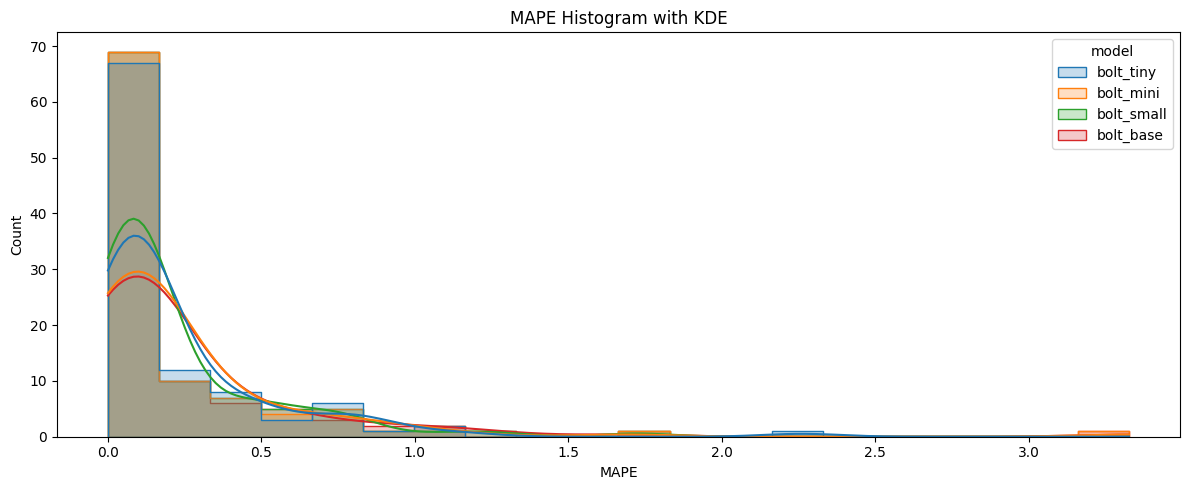

In [ ]:
# Clean and tag each leaderboard
def prepare_leaderboard(df, model_name):
    df = df.copy()
    df["MAPE"] = df["MAPE"].abs()
    df["MAE"] = df["MAE"].abs()
    df["model"] = model_name
    return df[["model", "MAPE", "MAE"]]

df_tiny = prepare_leaderboard(leaderboard_zero_shot_bolt_tiny, "bolt_tiny")
df_mini = prepare_leaderboard(leaderboard_zero_shot_bolt_mini, "bolt_mini")
df_small = prepare_leaderboard(leaderboard_zero_shot_bolt_small, "bolt_small")
df_base = prepare_leaderboard(leaderboard_zero_shot_bolt_base, "bolt_base")

# Combine all into one dataframe
df_all = pd.concat([df_tiny, df_mini, df_small, df_base], ignore_index=True)

plt.figure(figsize=(12, 5))
sns.histplot(data=df_all, x="MAPE", hue="model", kde=True, bins=20, element="step")
plt.title("MAPE Histogram with KDE")
plt.xlabel("MAPE")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

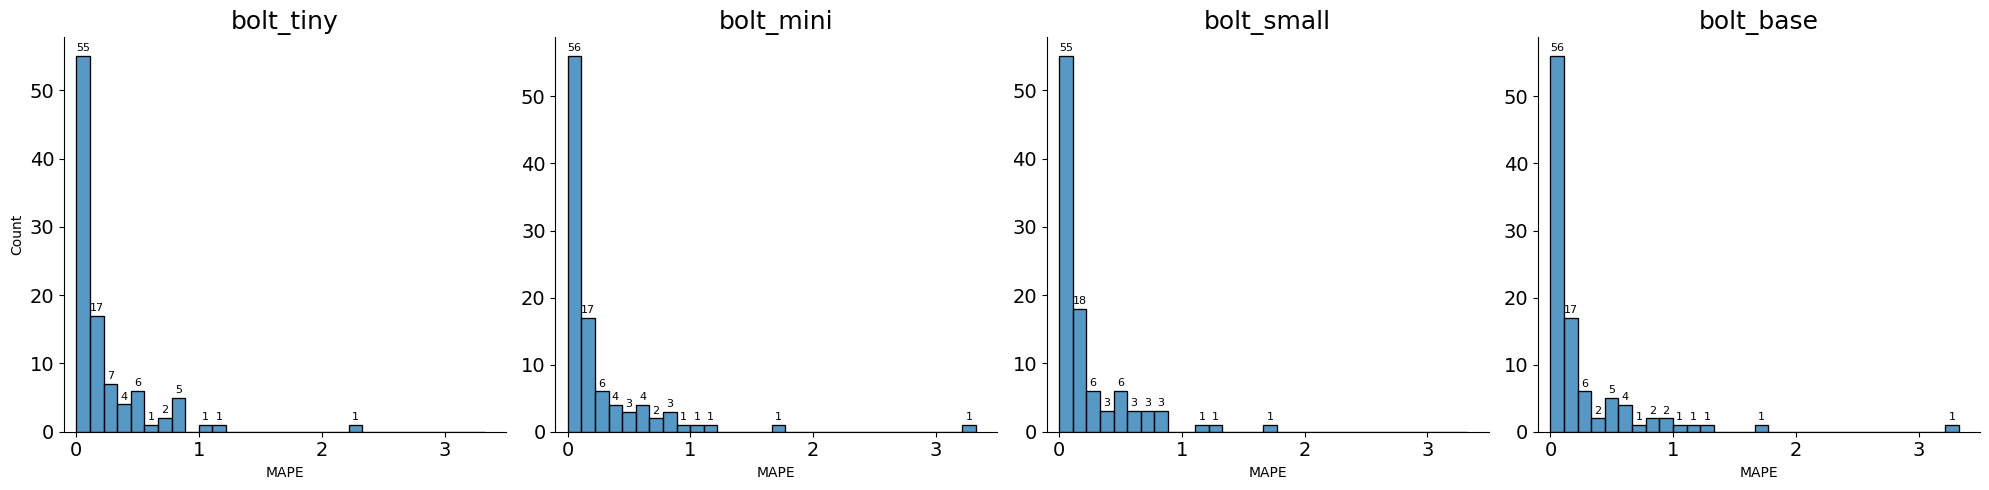

In [ ]:
g = sns.displot(data=df_all, x="MAPE", col="model", bins=30, facet_kws={'sharex': False, 'sharey': False})
for ax in g.axes.flatten():
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 2),
                        textcoords='offset points')
g.set(xlim=(-0.1,3.5))
g.set_titles("{col_name}", size=18)
g.set_axis_labels("MAPE", "Count")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()

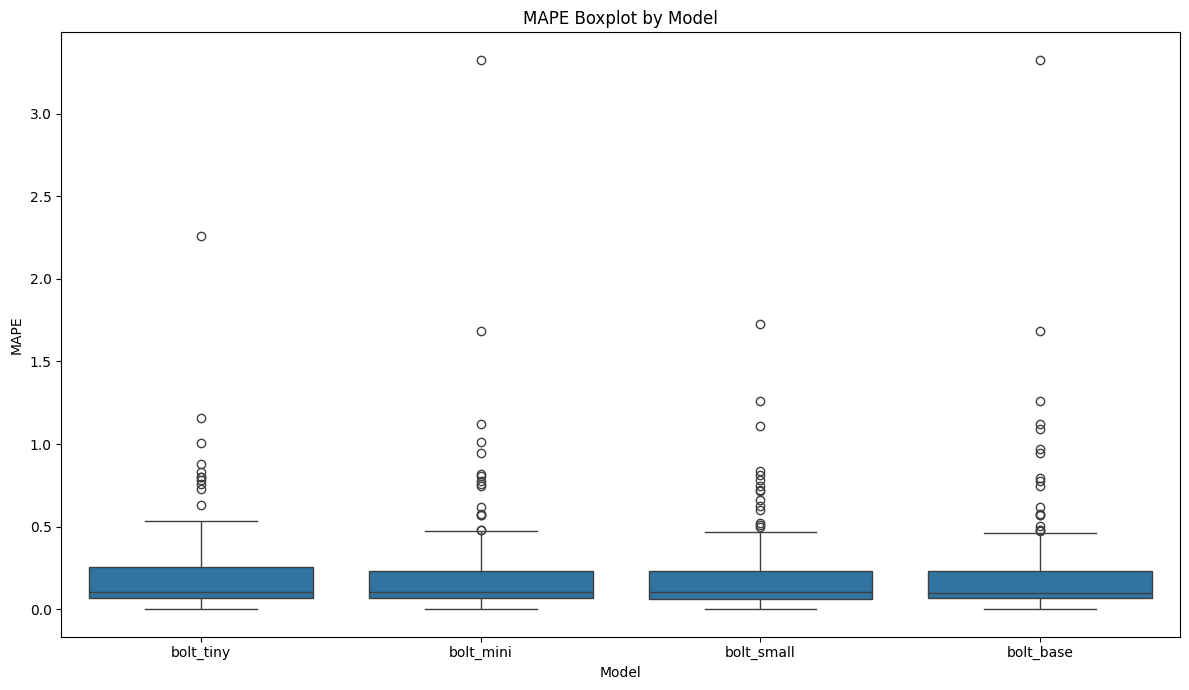

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_all, x="model", y="MAPE")
plt.title("MAPE Boxplot by Model")
plt.xlabel("Model")
plt.ylabel("MAPE")
plt.tight_layout()
plt.show()

### MAE plot

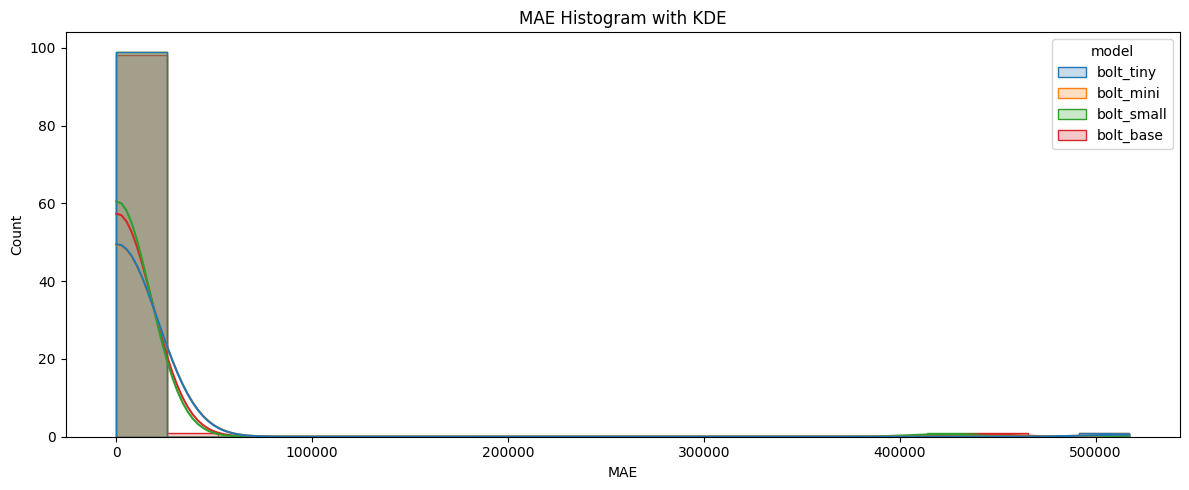

In [ ]:
# Clean and tag each leaderboard
plt.figure(figsize=(12, 5))
sns.histplot(data=df_all, x="MAE", hue="model", kde=True, bins=20, element="step")
plt.title("MAE Histogram with KDE")
plt.xlabel("MAE")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

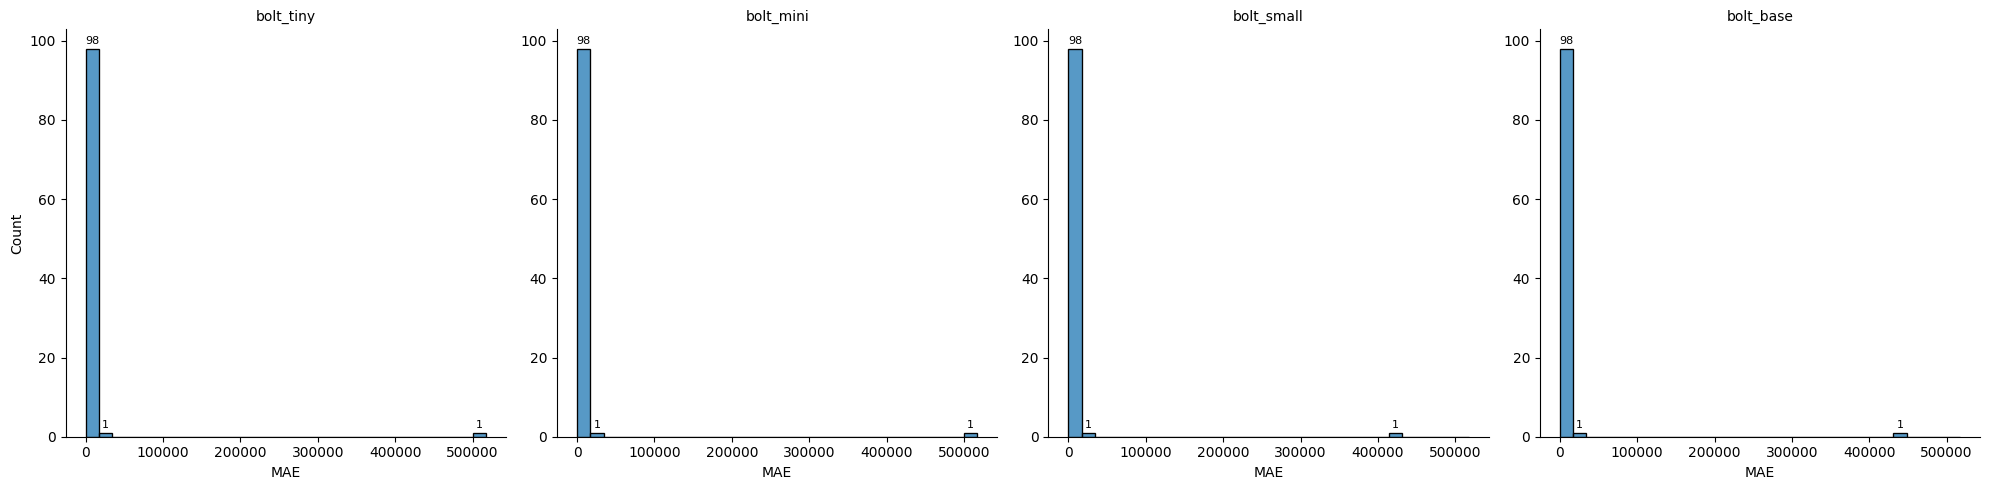

In [ ]:
g = sns.displot(data=df_all, x="MAE", col="model", bins=30, facet_kws={'sharex': False, 'sharey': False})
for ax in g.axes.flatten():
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 2),
                        textcoords='offset points')
g.set_titles("{col_name}")
g.set_axis_labels("MAE", "Count")
plt.tight_layout()
plt.show()

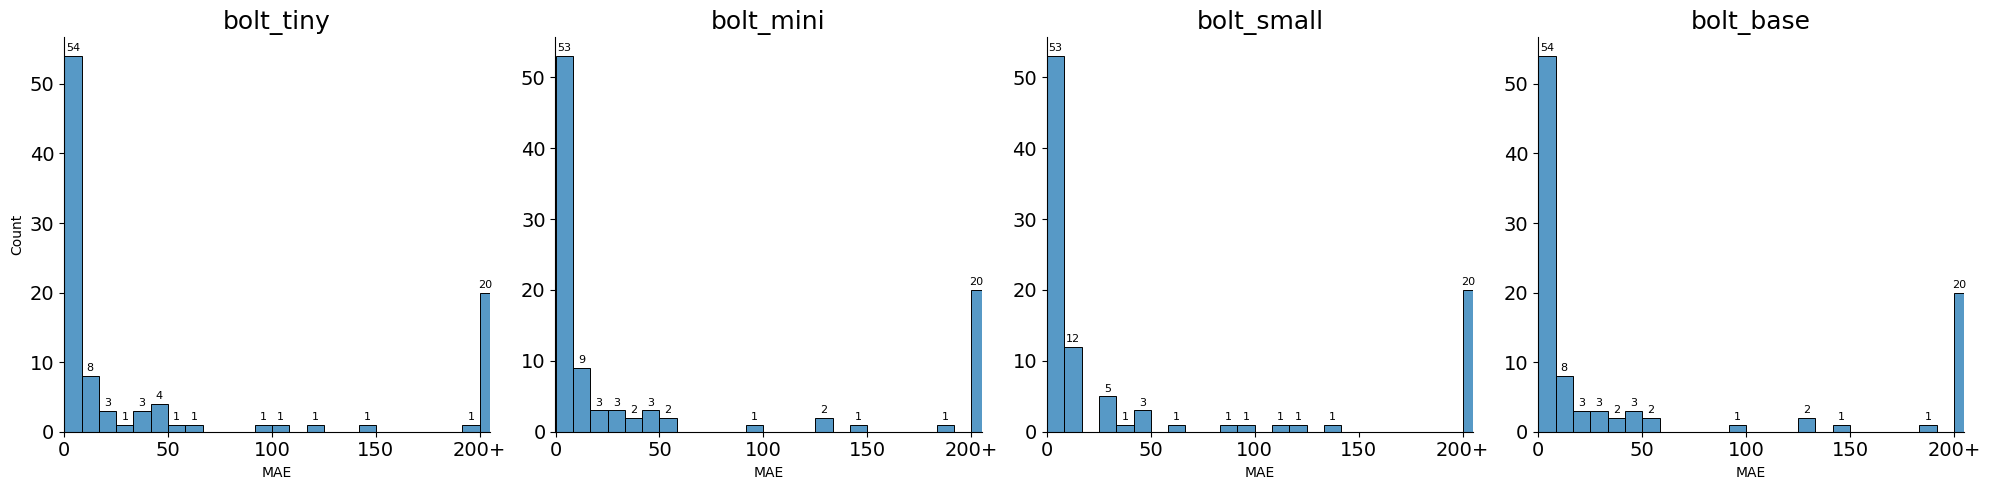

In [ ]:
# Step 1: Clip data to a fixed upper value (e.g., 201) to represent 200+
df_all = df_all.copy()
df_all["MAE_capped"] = df_all["MAE"].apply(lambda x: x if x <= 200 else 201)

# Step 2: Manually set bin edges including a fixed last bin for "200+"
bin_edges = np.append(np.linspace(0, 200, 25), 205)  # last bin is 200–205

# Step 3: Create the faceted histogram
g = sns.displot(
    data=df_all, x="MAE_capped", col="model",
    bins=bin_edges,
    facet_kws={'sharex': False, 'sharey': False}
)

# Step 4: Add count labels to bars
for ax in g.axes.flatten():
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(
                str(height),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 2),
                textcoords='offset points'
            )

# Step 5: Relabel last tick to "200+"
for ax in g.axes.flatten():
    xticks = ax.get_xticks()
    xticklabels = [f"{int(t)}" for t in xticks]
    for i, label in enumerate(xticklabels):
        if label == "200":
            xticklabels[i] = "200+"
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

g.set(xlim=(-0.1, 205))
g.set_titles("{col_name}", size=18)
g.set_axis_labels("MAE", "Count")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()

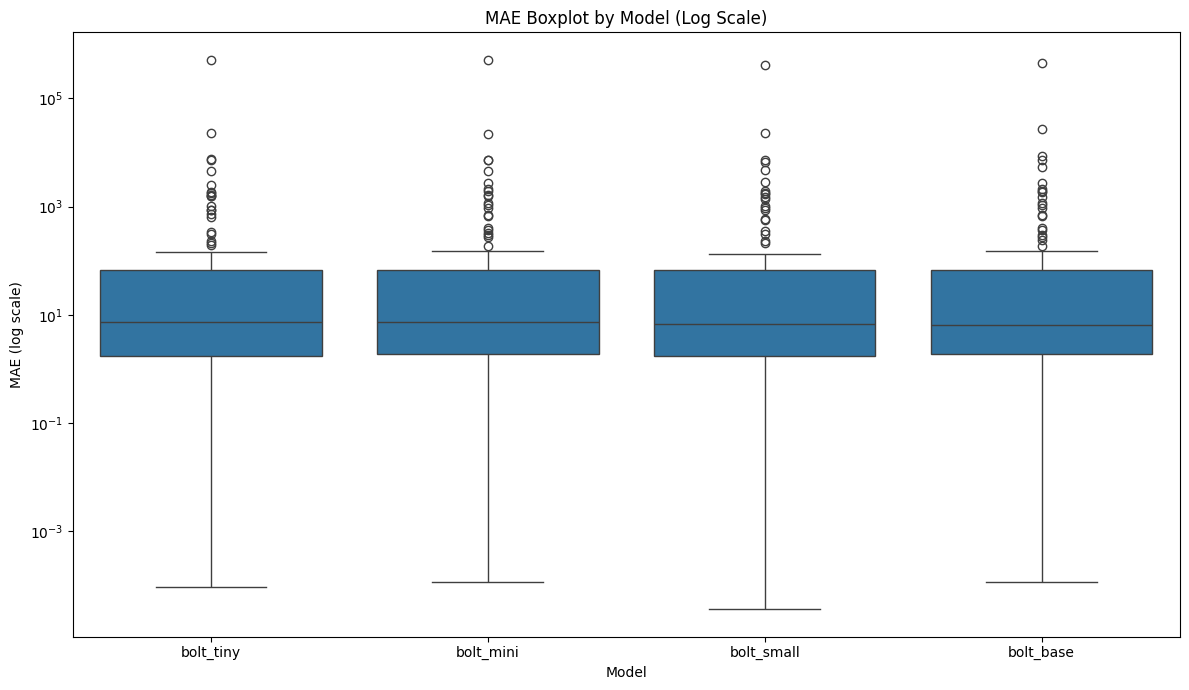

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_all, x="model", y="MAE")
plt.yscale("log")
plt.title("MAE Boxplot by Model (Log Scale)")
plt.xlabel("Model")
plt.ylabel("MAE (log scale)")
plt.tight_layout()
plt.show()